# Analysis of Dynamic Systems

## Schedule:

- Getting started
- Introduction
- Mathematical bases
- Modeling with linear elements
- State variables
- Block diagrams
- Time response
- Frequency response
- Stability
- Root Locus
- Final project
- Course evaluation

## Mathematical bases

- Complex Variable Theory.
- Differential equations.
- Laplace transform.
- Theory of matrices.
- Bode diagrams.

In [1]:
# Run this only in Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
colab_path = '/content/drive/My Drive/Colab Notebooks/dynamic-ud/notebooks/img/'
my_path = 'img/'
valid_path = colab_path # Use one of them depending on the platform

In [3]:
# Run this only in Colab
# Rendering SymPy equations in Colab requires the MathJax javascript library
from IPython.display import Math, HTML

def load_mathjax_in_cell_output():
  display(HTML("<script src='https://www.gstatic.com/external_hosted/"
               "mathjax/latest/MathJax.js?config=default'></script>"))
get_ipython().events.register('pre_run_cell', load_mathjax_in_cell_output)

### Bode plots

If you have a system of the form:

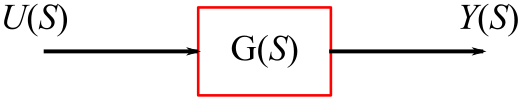

In [4]:
from IPython.display import SVG
SVG(valid_path + 'bode1.svg')

and a sinusoidal shape input is applied to this system:

$$\mu\left(t\right)=A\:sen\,\omega t\qquad\Longrightarrow\:U\left(S\right)=\frac{A\omega}{S^{2}+\omega^{2}}$$

Under these conditions, the system response **is also a sinusoidal signal at the same frequency of the $\mu\left(t\right)$, but with unknown magnitude and displacement**.

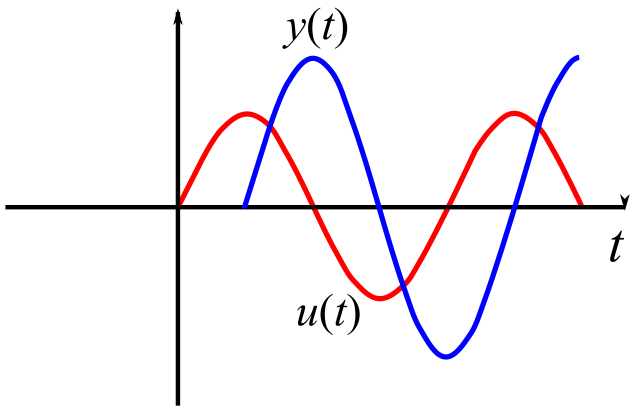

In [5]:
SVG(valid_path + 'bode2.svg')

$\Longrightarrow\;$ The analysis of the response in time is done in the same way as before (the transfer function of the system is multiplied by the input, partial fractions are applied, and inverse Laplace transform is applied), but all this is very long, besides, $\omega$ can change very quickly making the whole calculation inoperative.

$$Y\left(s\right)=U\left(s\right)G\left(s\right)=\frac{A\omega}{s^{2}+\omega^{2}}G\left(s\right)$$

$$Y\left(s\right)=\frac{A\omega}{\left(s+j\omega\right)\left(s-j\omega\right)}G\left(s\right)$$

$$Y\left(s\right)=\frac{R_{1}}{s+j\omega}+\frac{R_{2}}{s-j\omega}+Transient\:response$$

$\Longrightarrow\;$ If we assume that all the poles of $G(s)$ are on the left side of the complex plane, that is:

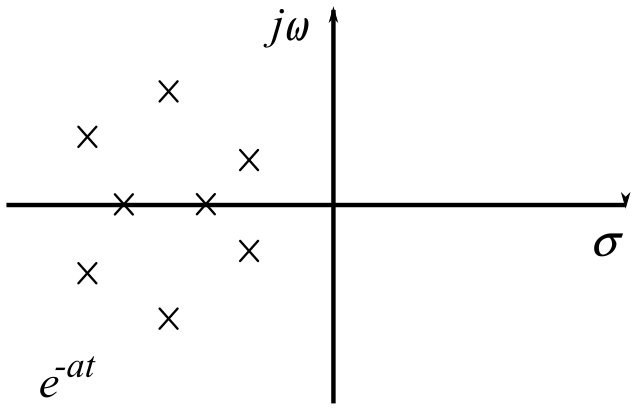

In [6]:
SVG(valid_path + 'bode3.svg')

$\Longrightarrow\;$ Then the behavior of these poles **is exponential**, and after a while **their influence disappears**. Therefore, for the analysis we can consider only the stationary response.

$$Y_{S}\left(s\right)=\frac{R_{1}}{s+j\omega}+\frac{R_{2}}{s-j\omega}$$

$\Longrightarrow\;$ Observing this expression, we see that only the value $s=\pm j\omega$ is allowed, that is, they are **only on the vertical axis of the complex plane**, that is:

$$G\left(s\right)=G\left(j\omega\right)$$

In [7]:
SVG(valid_path + 'bode4.svg')

$$\Longrightarrow\;y_{S}\left(t\right)=A\:R\left(\omega\right)\,sen\left(\omega t+\phi\left(\omega\right)\right)$$

$$\Longrightarrow\;R\left(\omega\right)=\left\Vert G\left(j\omega\right)\right\Vert $$

$$\Longrightarrow\;\phi\left(\omega\right)=\measuredangle\:G\left(j\omega\right)$$

$\Longrightarrow\;$ That is, **if the input is sinusoidal, then the output is sinusoidal**.

$\Longrightarrow\;$ You must calculate $R\left(\omega\right)$ and $\phi\left(\omega\right)$ by some simple and quick method, $\Longrightarrow\;$ **Bode plots!!!**

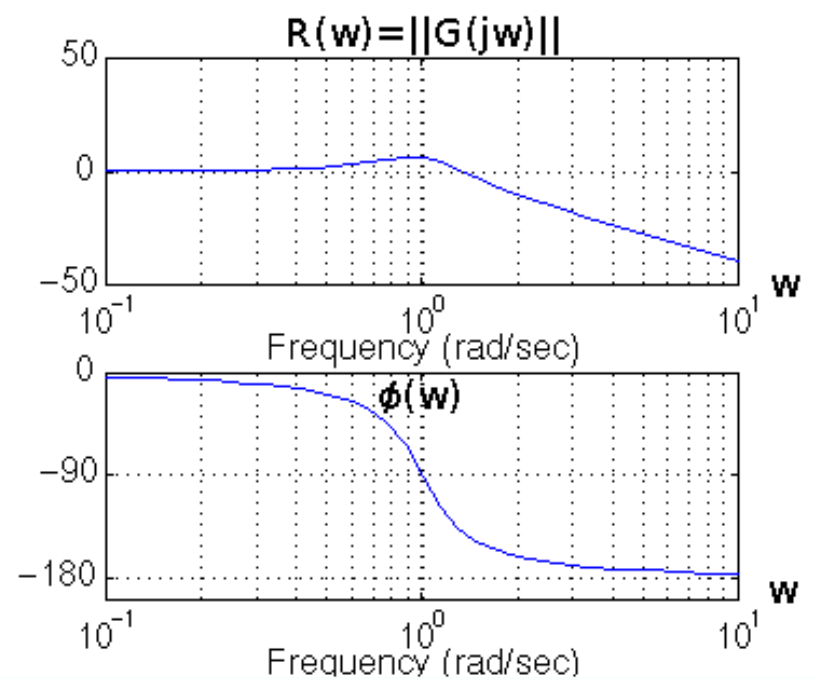

In [8]:
from IPython.display import Image
Image(filename=valid_path + 'bode5.png')

$\Longrightarrow\;$ From these plots you can calculate $y_{S}\left(t\right)$ for **any $\omega$ value**.

### Construction of Bode plots

$\Longrightarrow\;$ Complex variable $s=j\omega$

$\Longrightarrow\;$ The logarithm of a complex number is a complex number, like this:

$$log\:G\left(j\omega\right)=log\,\left(\left\Vert G\left(j\omega\right)\right\Vert \:e^{j\phi\left(\omega\right)}\right)$$

$$log\:G\left(j\omega\right)=log\,\left\Vert G\left(j\omega\right)\right\Vert +log\,e^{j\phi\left(\omega\right)}$$

$$\begin{array}{c}
log\:G\left(j\omega\right)=\underbrace{log\,\left\Vert G\left(j\omega\right)\right\Vert }+\underbrace{j0.434\phi\left(\omega\right)}\\
\quad\quad\quad\quad\quad\quad\quad parte\:real\quad parte\:compleja
\end{array}$$

$\Longrightarrow\;$ The real part corresponds to the logarithm of the Output/Input ratio, which is normally measured in decibels [dB] regardless of the units. It is normally analyzed in frequency intervals of the form:
- if for example $\frac{f_{2}}{f_{1}}=2$, there is an interval of one octave.
- if for example $\frac{f_{2}}{f_{1}}=10$, there is an interval of one decade.

$\Longrightarrow\;$ **Magnitude of the logarithm:** $L_{m}\,G\left(j\omega\right)=20\:log\left\Vert G\left(j\omega\right)\right\Vert \:\textrm{dB}$

### General relations

The general forms that can be found in a transfer function for a linear, time-invariant system are:

$$G\left(j\omega\right)=\frac{K\left(j\omega T_{1}+1\right)\left(j\omega T_{2}+1\right)^{r}\cdots}{\left(j\omega\right)^{m}\left(j\omega T_{0}+1\right)\left[\frac{\left(j\omega\right)^{2}}{\omega_{0}^{2}}+\frac{2\xi}{\omega_{0}}j\omega+1\right]\cdots}
$$

$K\longrightarrow$ Gain constant.

$$L_{m}\,G\left(j\omega\right)=L_{m}\,K+L_{m}\left(j\omega T_{1}+1\right)+r\,L_{m}\left(j\omega T_{2}+1\right)\cdots$$

$$\cdots-m\,L_{m}\left(j\omega\right)-L_{m}\left(j\omega T_{0}+1\right)-L_{m}\left[\frac{\left(j\omega\right)^{2}}{\omega_{0}^{2}}+\frac{2\xi}{\omega_{0}}j\omega+1\right]-\cdots
$$

And the angle:

$$\measuredangle G\left(j\omega\right)=\measuredangle K+\measuredangle\left(j\omega T_{1}+1\right)+r\,\measuredangle\left(j\omega T_{2}+1\right)+\cdots$$

$$\cdots-m\,\measuredangle\left(j\omega\right)-\measuredangle\left(j\omega T_{0}+1\right)-\measuredangle\left(\frac{\left(j\omega\right)^{2}}{\omega_{0}^{2}}+\frac{2\xi}{\omega_{0}}j\omega+1\right)-\cdots
$$

$$\Longrightarrow\:\measuredangle G\left(j\omega\right)=\measuredangle K+tan^{-1}\left(\omega T_{1}\right)+r\,tan^{-1}\left(\omega T_{2}\right)+\cdots$$

$$\cdots-m\,90^{\textrm{o}}-tan^{-1}\left(\omega T_{0}\right)-tan^{-1}\left(\frac{\frac{2\xi}{\omega_{0}}\omega}{1-\frac{\omega^{2}}{\omega_{0}^{2}}}\right)-\cdots$$

- If $K$ is positive $\left(K\geq0\right)\:\Longrightarrow\measuredangle K=90^{\textrm{o}}$

- If $K$ is negative $\left(K<0\right)\:\Longrightarrow\measuredangle K=180^{\textrm{o}}$

### Constant factors $\longrightarrow K$

$$L_{m}\,K=20\:log\,K\:\left[\textrm{dB}\right]$$

$\Longrightarrow\;$ It's a straight horizontal line that raises or lowers the curve $\longrightarrow$ gain!!!

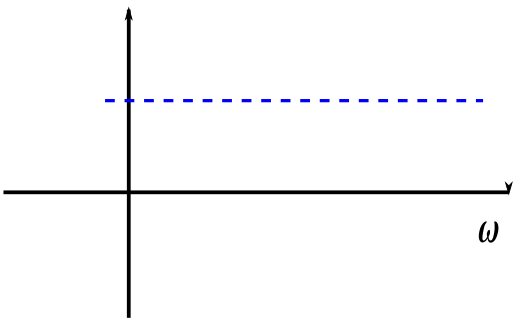

In [9]:
SVG(valid_path + 'bode6.svg')

### Factors $\longrightarrow j\omega$

When it's in the denominator:

$$L_{m}\left(\frac{1}{j\omega}\right)=20\:log\left\Vert \frac{1}{j\omega}\right\Vert =-20\:log\,\omega$$

It is a straight line with a negative slope of -20 dB/decade. The angle is constant and equal to $-90^{\textrm{o}}$.

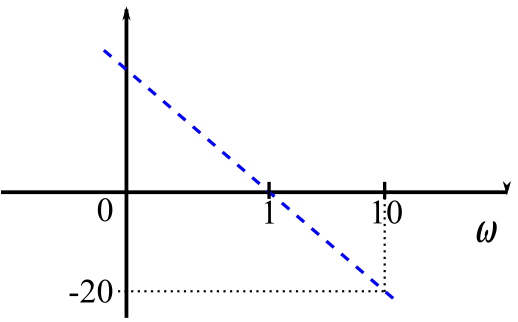

In [10]:
SVG(valid_path + 'bode7.svg')

$\Longrightarrow\;$ When it's in the numerator:

$$L_{m}\left(j\omega\right)=20\:log\left\Vert j\omega\right\Vert =20\:log\,\omega$$

It is a straight line with a positive slope of 20 dB/decade. The angle is constant and equal to $+90^{\textrm{o}}$.

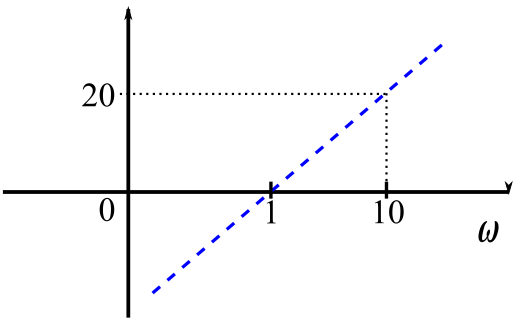

In [11]:
SVG(valid_path + 'bode8.svg')

$$\left(j\omega\right)^{\pm m}\longrightarrow line\:with\:slope\:\pm m\,20\,\textrm{dB/D}$$

$$\measuredangle=\pm m\,90^{\textrm{o}}$$

### First-order factors $\longrightarrow\left(j\omega T+1\right)$

$\Longrightarrow\;$ When it's in the denominator:

$$L_{m}\left(\frac{1}{j\omega T+1}\right)=20\:log\left\Vert \frac{1}{j\omega T+1}\right\Vert =-20\:log\left[\sqrt{\omega^{2}T^{2}+1}\right]$$

$\Longrightarrow\;$ $\textrm{If}\:\omega T\ll1$ (low frequencies)

$$\Longrightarrow\:L_{m}\left(\frac{1}{j\omega T+1}\right)\approx-20\:log\left(1\right)=0\:\textrm{dB}$$

$\Longrightarrow\;$ $\textrm{Si}\:\omega T\gg1$ (high frequencies)

$$\Longrightarrow\:L_{m}\left(\frac{1}{j\omega T+1}\right)\approx-20\:log\left(\omega T\right)$$

These two lines meet at: $\omega=\omega_{0}=\frac{1}{T}\longrightarrow$ cut-off frequency, from which you have a line with a slope of -20 dB/D.

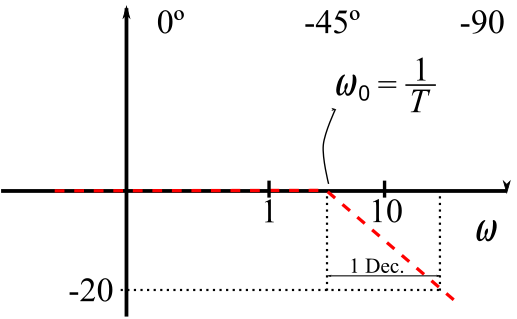

In [12]:
SVG(valid_path + 'bode9.svg')

$\Longrightarrow\;$ When it's in the numerator:

$$L_{m}\left(j\omega T+1\right)=20\:log\left\Vert j\omega T+1\right\Vert =20\:log\left[\sqrt{\omega^{2}T^{2}+1}\right]$$

$\Longrightarrow\;$ $\textrm{If}\:\omega T\ll1$ (low frequencies)

$$\Longrightarrow\:L_{m}\left(j\omega T+1\right)\approx20\:log\left(1\right)=0\:\textrm{dB}$$

$\Longrightarrow\;$ $\textrm{Si}\:\omega T\gg1$ (high frequencies)

$$\Longrightarrow\:L_{m}\left(j\omega T+1\right)\approx20\:log\left(\omega T\right)$$

These two lines meet at: $\omega=\omega_{0}=\frac{1}{T}\longrightarrow$ cut-off frequency, from which you have a line with a slope of 20 dB/D.

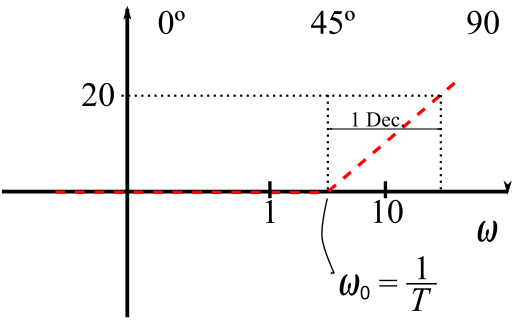

In [14]:
SVG(valid_path + 'bode10.svg')

### Quadratic factors $\longrightarrow\left(\frac{\left(j\omega\right)^{2}}{\omega_{0}^{2}}+\frac{2\xi}{\omega_{0}}j\omega+1\right)$

$\Longrightarrow\;$ When $\xi>1$ (real and distinct poles/zeros), $\Longrightarrow$ can be factored into two first order terms and analyzed as above.

$\Longrightarrow\;$ When $\xi<1 \Longrightarrow$ conjugated complexes, the following applies:

$\Longrightarrow\;$ When it's in the denominator:

$$L_{m}\left(\frac{1}{\frac{\left(j\omega\right)^{2}}{\omega_{0}^{2}}+\frac{2\xi}{\omega_{0}}j\omega+1}\right)=20\:log\left\Vert \frac{1}{\frac{\left(j\omega\right)^{2}}{\omega_{0}^{2}}+\frac{2\xi}{\omega_{0}}j\omega+1}\right\Vert =-20\:log\left[\sqrt{\left(\frac{2\xi\omega}{\omega_{0}^{2}}\right)^{2}+\left(1-\frac{\omega^{2}}{\omega_{0}^{2}}\right)^{2}}\right]
$$

With an angle:

$$\phi\left(\omega\right)=-tan^{-1}\left(\frac{\frac{2\xi\omega}{\omega_{0}}}{1-\frac{\omega^{2}}{\omega_{0}^{2}}}\right)$$

$\Longrightarrow\;$ $\textrm{If}\:\omega \ll\omega_0$ (low frequencies)

$$\Longrightarrow\:L_{m}\left(\frac{1}{\frac{\left(j\omega\right)^{2}}{\omega_{0}^{2}}+\frac{2\xi}{\omega_{0}}j\omega+1}\right)\approx-20\:log\left(1\right)=0\:\textrm{dB}
$$

$\Longrightarrow\;$ $\textrm{Si}\:\omega \gg\omega_0$ (high frequencies)

$$\Longrightarrow\:L_{m}\left(\frac{1}{\frac{\left(j\omega\right)^{2}}{\omega_{0}^{2}}+\frac{2\xi}{\omega_{0}}j\omega+1}\right)\approx-20\:log\left(\frac{\omega^{2}}{\omega_{0}^{2}}\right)=-40\:log\frac{\omega}{\omega_{0}}
$$

These two lines meet at: $\omega=\omega_{0}$ natural or resonance frequency, from which there is a line with a slope of -40 dB/D.

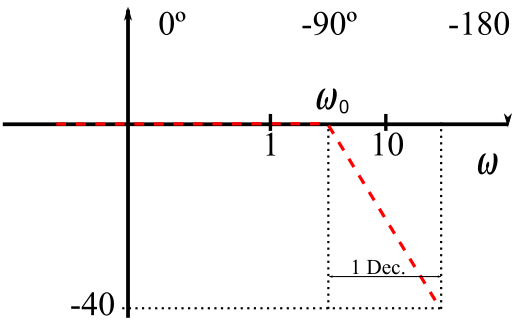

In [15]:
SVG(valid_path + 'bode11.svg')

$\Longrightarrow\;$ When it's in the numerator:

$$L_{m}\left(\frac{\left(j\omega\right)^{2}}{\omega_{0}^{2}}+\frac{2\xi}{\omega_{0}}j\omega+1\right)=20\:log\left\Vert \frac{\left(j\omega\right)^{2}}{\omega_{0}^{2}}+\frac{2\xi}{\omega_{0}}j\omega+1\right\Vert =20\:log\left[\sqrt{\left(\frac{2\xi\omega}{\omega_{0}^{2}}\right)^{2}+\left(1-\frac{\omega^{2}}{\omega_{0}^{2}}\right)^{2}}\right]
$$

With an angle:

$$\phi\left(\omega\right)=tan^{-1}\left(\frac{\frac{2\xi\omega}{\omega_{0}}}{1-\frac{\omega^{2}}{\omega_{0}^{2}}}\right)$$

$\Longrightarrow\;$ $\textrm{If}\:\omega \ll\omega_0$ (low frequencies)

$$\Longrightarrow\:L_{m}\left(\frac{\left(j\omega\right)^{2}}{\omega_{0}^{2}}+\frac{2\xi}{\omega_{0}}j\omega+1\right)\approx20\:log\left(1\right)=0\:\textrm{dB}
$$

$\Longrightarrow\;$ $\textrm{Si}\:\omega \gg\omega_0$ (high frequencies)

$$\Longrightarrow\:L_{m}\left(\frac{\left(j\omega\right)^{2}}{\omega_{0}^{2}}+\frac{2\xi}{\omega_{0}}j\omega+1\right)\approx20\:log\left(\frac{\omega^{2}}{\omega_{0}^{2}}\right)=40\:log\frac{\omega}{\omega_{0}}
$$

These two lines meet at: $\omega=\omega_{0}$ natural or resonance frequency, from which there is a line with a slope of 40 dB/D.

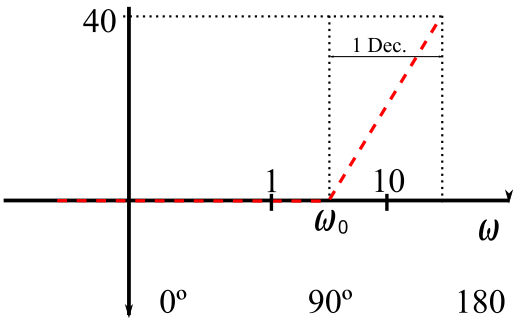

In [16]:
SVG(valid_path + 'bode12.svg')

### Example:

Develop the Bode plot (magnitude and phase) for the system defined by:

$$G\left(s\right)=\frac{10\left(s+10\right)}{s\left(s+2\right)\left(s+50\right)}$$

### Solution

Since the logarithm of a product is the sum of the logarithms of the factors, you can graph each of the factors individually, and then add up all the contributions.

The first step is to take the transfer function to canonical form:

$$G\left(s\right)=10\frac{\frac{10}{10}\left(s+10\right)}{s\frac{2}{2}\left(s+2\right)\frac{50}{50}\left(s+50\right)}=10\frac{\left(10\right)}{\left(2\right)\left(50\right)}\frac{\left(\frac{s}{10}+1\right)}{s\left(\frac{s}{2}+1\right)\left(\frac{s}{50}+1\right)}=1\frac{\left(\frac{s}{10}+1\right)}{s\left(\frac{s}{2}+1\right)\left(\frac{s}{50}+1\right)}
$$

$\Longrightarrow\;$ 1 $\longrightarrow L_{m}\left(1\right)=20\:log\left(1\right)=0$

$\Longrightarrow\;$ $\left(\frac{s}{10}+1\right)\longrightarrow$ line with zero slope until $\omega=10$, and from there it goes up with 20 dB/D slope.

$\Longrightarrow\;$ $s\longrightarrow$ line with a slope of -20 dB/D.

$\Longrightarrow\;$ $\left(\frac{S}{2}+1\right)\longrightarrow$ line with zero slope until $\omega=2$, and from there down with -20 dB/D slope.

$\Longrightarrow\;$ $\left(\frac{S}{50}+1\right)\longrightarrow$ line with zero slope until $\omega=50$, and from there down with -20 dB/D slope.

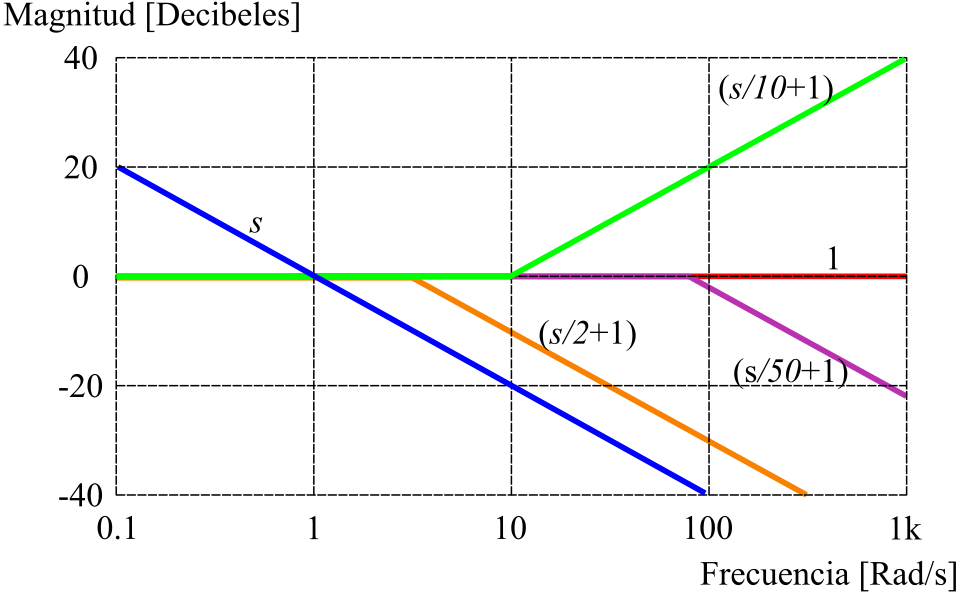

In [17]:
SVG(valid_path + 'bode13.svg')

And the sum of these asymptotes gives us:

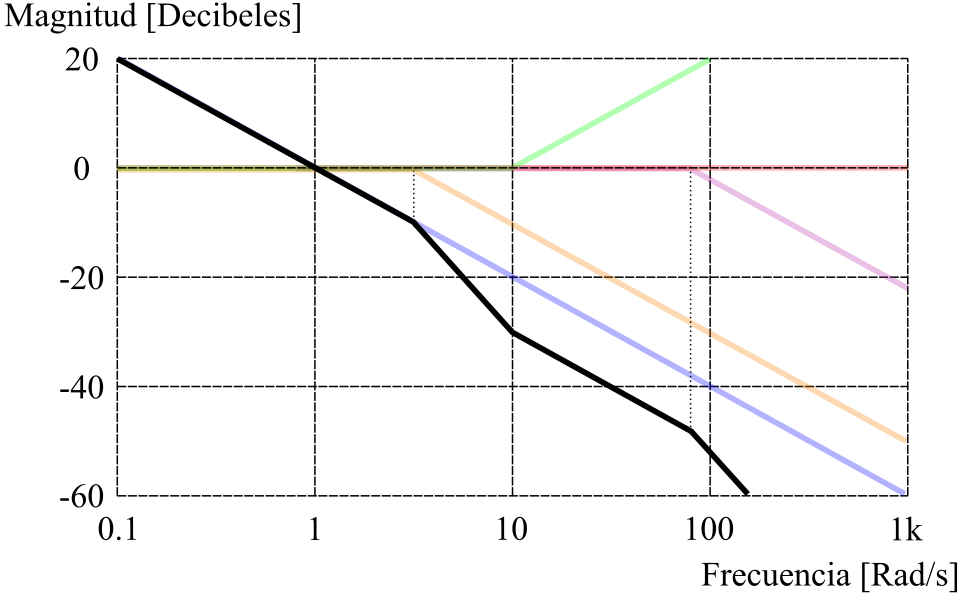

In [18]:
SVG(valid_path + 'bode14.svg')

A general expression used to calculate the phase diagram from the magnitude diagram (as long as the system is a minimum phase) is:

$$\phi=\frac{\alpha}{20}\left(\frac{\pi}{2}\right)$$

where $\alpha$ is the average slope on the magnitude graph. This expression is used at breakpoints and at very low or very high frequencies. Applying this in this example:

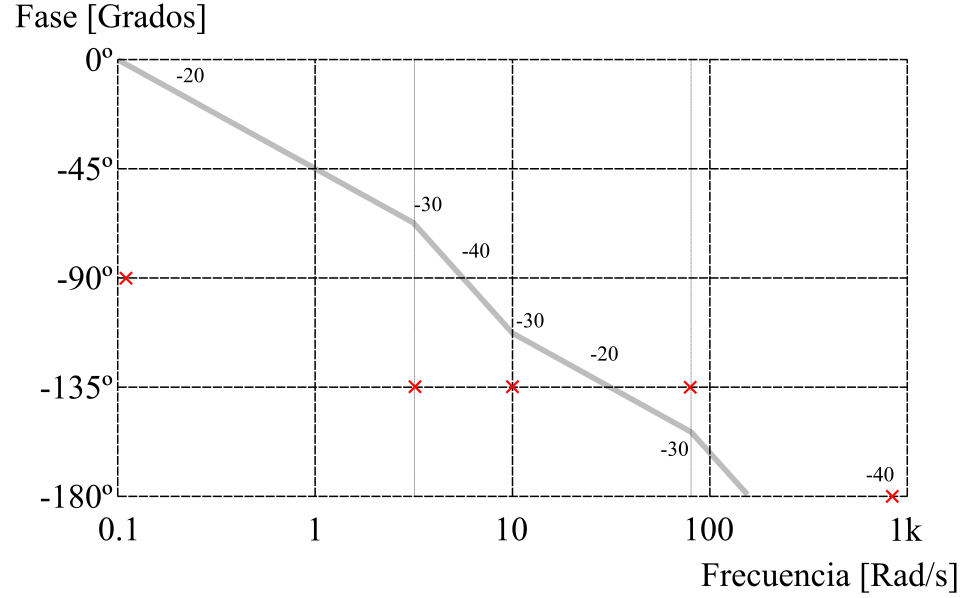

In [19]:
SVG(valid_path + 'bode15.svg')

And by connecting these points with a curve, you get the phase diagram:

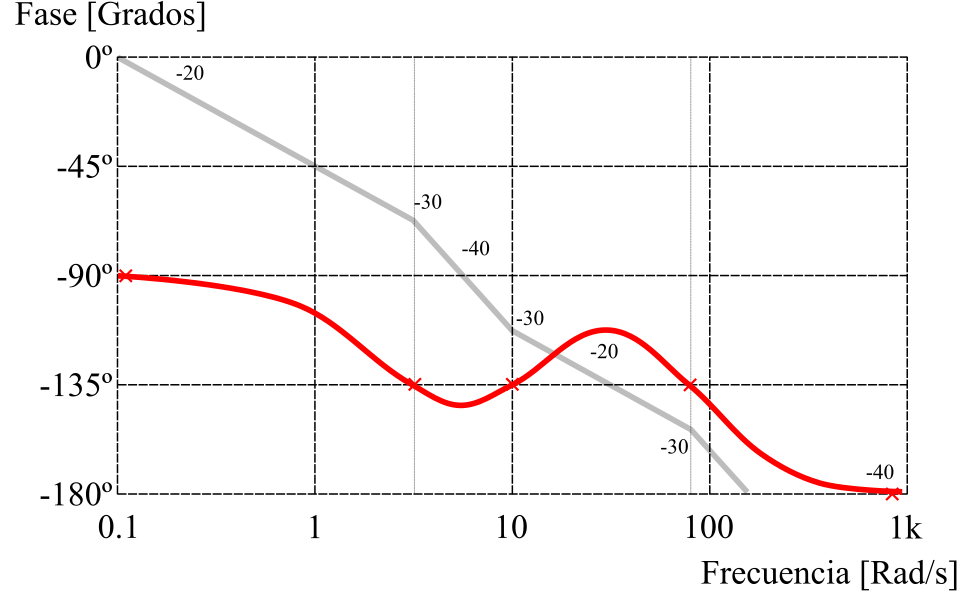

In [20]:
SVG(valid_path + 'bode16.svg')

Whit Python:

In [21]:
import sympy
from sympy import *

sympy.init_printing()
s = Symbol('s')
t = Symbol('t', positive=True)

In [22]:
G = ((10)*(s+10))/((s)*(s+2)*(s+50))

In [23]:
G

    10⋅s + 100    
──────────────────
s⋅(s + 2)⋅(s + 50)

In [24]:
G.expand()

       10⋅s                 100        
────────────────── + ──────────────────
 3       2            3       2        
s  + 52⋅s  + 100⋅s   s  + 52⋅s  + 100⋅s

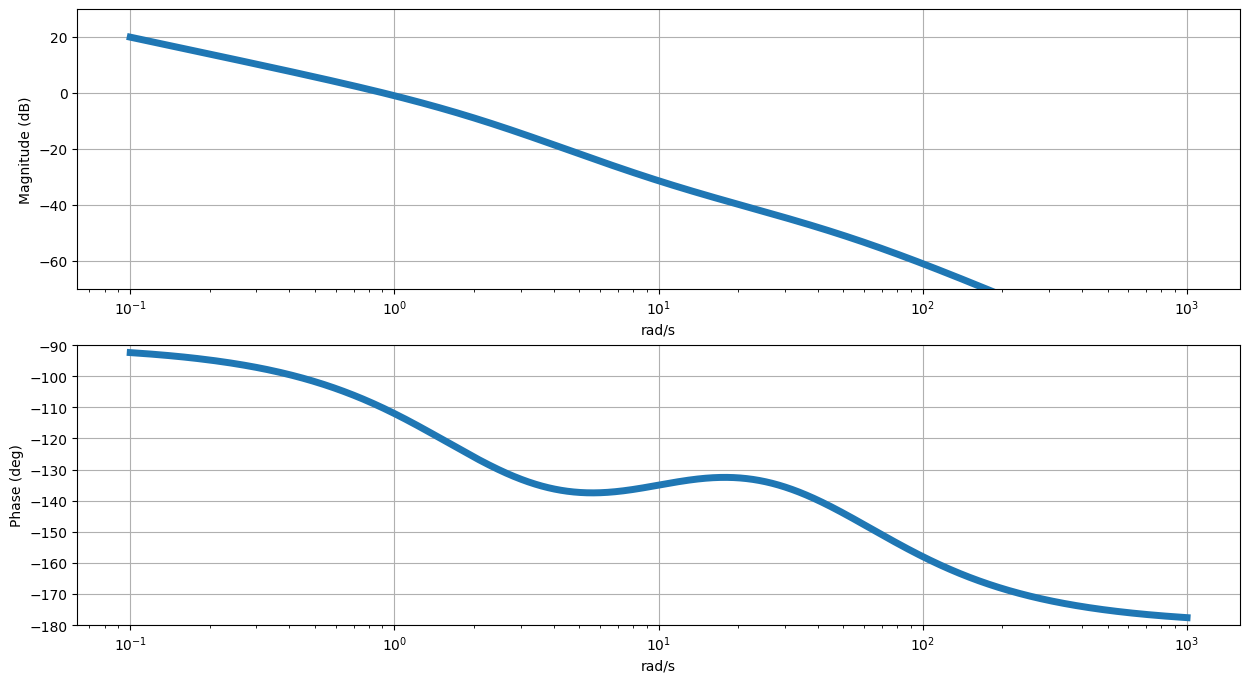

In [25]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

s1 = signal.lti([10, 100], [1, 52, 100, 0])
w, mag, phase = signal.bode(s1, np.arange(0.1, 1000.0, 0.01).tolist())

plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.semilogx(w, mag, lw=5)    # Bode magnitude plot

plt.ylim([-70, 30]) # Limites grafica magnitud eje y
plt.xlabel('rad/s')
plt.ylabel('Magnitude (dB)')
plt.grid(True)

plt.subplot(2,1,2)
plt.semilogx(w, phase, lw=5, label="real bode plot")  # Bode phase plot

plt.xlabel('rad/s')
plt.ylim([-180, -90]) # Limites grafica fase eje y
plt.ylabel('Phase (deg)')
plt.grid(True)
plt.show()

### Example:

Calculate the stationary response in the time of:

$$\frac{Y\left(s\right)}{U\left(s\right)}=\frac{5\left(s+10\right)}{s\left(s+20\right)\left(s+100\right)}$$

for $\omega$ = 1, 10, 100 and 1000 rad/s if $\mu\left(t\right)=10\:sen\left(\omega t\right)$

### Solution

You could calculate the partial fraction and inverse Laplace response for each of the inputs, but the idea is to use Bode's plots. For sinusoidal inputs, the output response is of the form:

$$y_{S}\left(t\right)=A\:R\left(\omega\right)\,sen\left(\omega t+\phi\left(\omega\right)\right)=10\:R\left(\omega\right)\,sen\left(\omega t+\phi\left(\omega\right)\right)
$$

where $R\left(\omega\right)$ is derived from Bode's magnitude diagram, and $\phi\left(\omega\right)$ from Bode's phase diagram.

To graph the Bode plot, the factors of the transfer function are taken to the canonical form:

$$\frac{Y\left(s\right)}{U\left(s\right)}=\frac{\left(5\right)\left(10\right)\left(\frac{s}{10}+1\right)}{\left(20\right)\left(100\right)s\left(\frac{s}{20}+1\right)\left(\frac{s}{100}+1\right)}=\frac{\left(0.025\right)\left(\frac{s}{10}+1\right)}{s\left(\frac{s}{20}+1\right)\left(\frac{s}{100}+1\right)}
$$

Bode's asymptotes are:

$\Longrightarrow\;$ 0.025 $\longrightarrow L_{m}\left(0.025\right)=20\:log\left(0.025\right)=-32$

$\Longrightarrow\;$ $\left(\frac{s}{10}+1\right)\longrightarrow$ line with zero slope until $\omega=10$, and from there it goes up with 20 dB/D slope.

$\Longrightarrow\;$ $s\longrightarrow$ line with a slope of -20 dB/D.

$\Longrightarrow\;$ $\left(\frac{S}{20}+1\right)\longrightarrow$ line with zero slope until $\omega=20$, and from there down with -20 dB/D slope.

$\Longrightarrow\;$ $\left(\frac{S}{100}+1\right)\longrightarrow$ line with zero slope until $\omega=100$, and from there down with -20 dB/D slope.

By graphing and adding up these asymptotes you get something similar to:

In [26]:
import sympy
from sympy import *

sympy.init_printing()
s = Symbol('s')
t = Symbol('t', positive=True)

In [27]:
G = ((5)*(s+10))/((s)*(s+20)*(s+100))

In [28]:
G

      5⋅s + 50      
────────────────────
s⋅(s + 20)⋅(s + 100)

In [29]:
G.expand()

        5⋅s                     50         
──────────────────── + ────────────────────
 3        2             3        2         
s  + 120⋅s  + 2000⋅s   s  + 120⋅s  + 2000⋅s

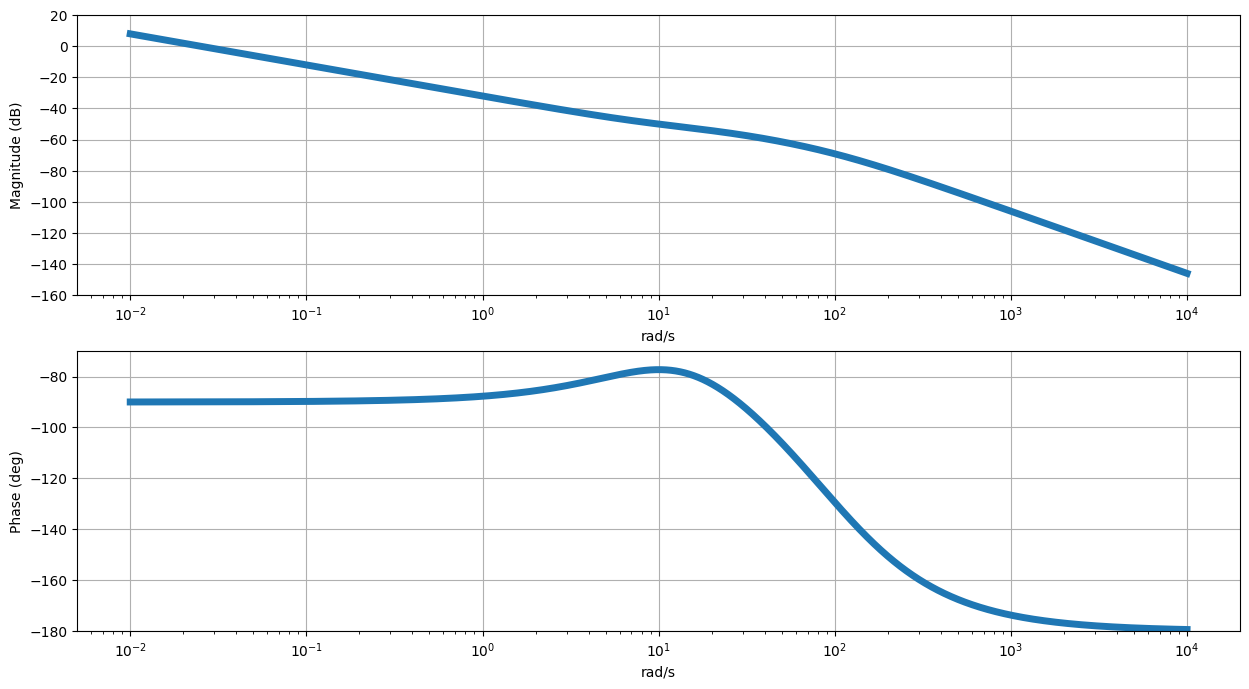

In [30]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

s1 = signal.lti([5, 50], [1, 120, 2000, 0])
w, mag, phase = signal.bode(s1, np.arange(0.01, 10000.0, 0.01).tolist())

plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.semilogx(w, mag, lw=5)    # Bode magnitude plot

plt.ylim([-160, 20]) # Limites grafica magnitud eje y
plt.xlabel('rad/s')
plt.ylabel('Magnitude (dB)')
plt.grid(True)

plt.subplot(2,1,2)
plt.semilogx(w, phase, lw=5, label="real bode plot")  # Bode phase plot

plt.xlabel('rad/s')
plt.ylim([-180, -70]) # Limites grafica fase eje y
plt.ylabel('Phase (deg)')
plt.grid(True)
plt.show()

The answers are:

$$y_{S1}\left(t\right)=\left(10\right)\left(-32\right)\:sen\left(t-87^{\textrm{o}}\right)=-320\:sen\left(t-87^{\textrm{o}}\right)$$

$$y_{S10}\left(t\right)=\left(10\right)\left(-50\right)\:sen\left(10t-77^{\textrm{o}}\right)=-500\:sen\left(10t-77^{\textrm{o}}\right)$$

$$y_{S100}\left(t\right)=\left(10\right)\left(-70\right)\:sen\left(100t-130^{\textrm{o}}\right)=-700\:sen\left(100t-130^{\textrm{o}}\right)$$

$$y_{S1000}\left(t\right)=\left(10\right)\left(-108\right)\:sen\left(1000t-174^{\textrm{o}}\right)=-1080\:sen\left(1000t-174^{\textrm{o}}\right)$$

### Workshop

- Determine the stationary response of $\frac{Y\left(s\right)}{U\left(s\right)}=\frac{5\left(s+10\right)}{s\left(s+2\right)^{2}}$, if the input is $\mu\left(t\right)=10\:sen\left(\omega t\right)$ for $\omega$ = 1, 10, 100 y 1000 rad/s.
- Determine the stationary response of $\frac{Y\left(s\right)}{U\left(s\right)}=\frac{50\left(s+5\right)}{\left[\left(s+3\right)^{2}+4^{2}\right]\left(s+10\right)}$, if the input is $\mu\left(t\right)=5\:sen\left(\omega t\right)$ for $\omega$ = 1, 10, 100 y 1000 rad/s.
- How is the stationary response when the entry is of the form $\mu\left(t\right)=A\:sen\left(\omega t+\theta\right)$?

### Detail about quadratic behavior

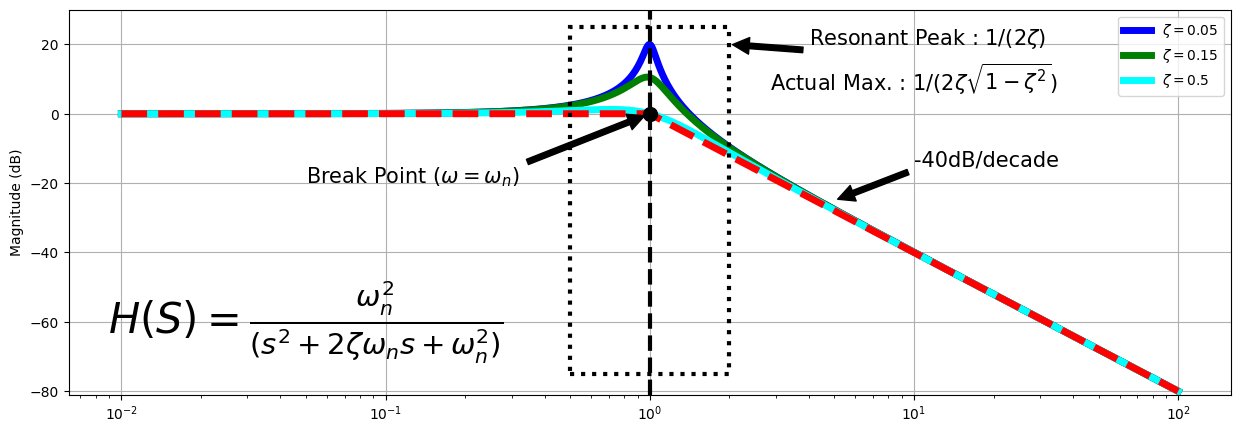

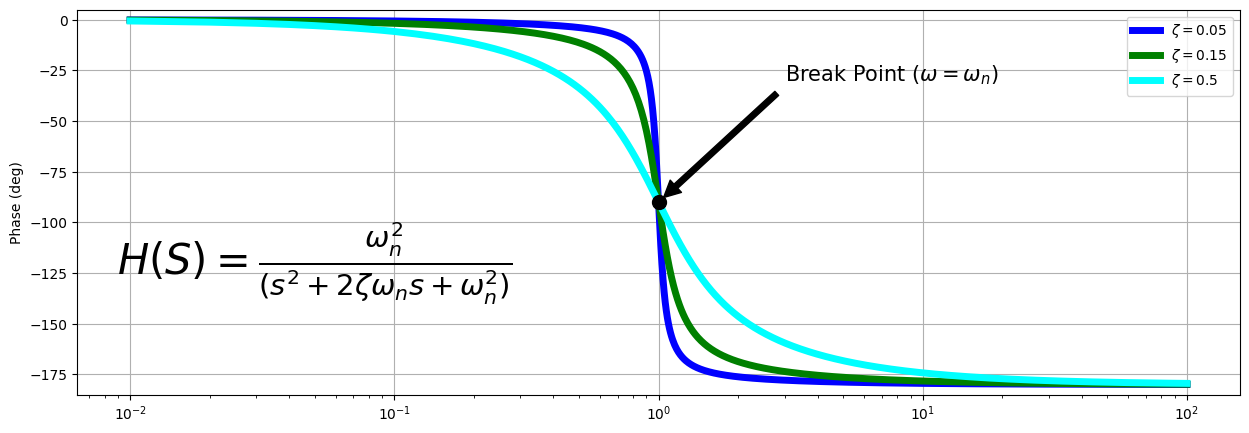

In [31]:
import matplotlib.patches as patches
%matplotlib inline

zeta = np.array([0.05, 0.15, 0.5])
s1 = signal.lti([1], [1, 2*zeta[0], 1])
s2 = signal.lti([1], [1, 2*zeta[1], 1])
s3 = signal.lti([1], [1, 2*zeta[2], 1])

w, mag1, phase1 = signal.bode(s1, np.arange(0.01, 100.0, 0.01).tolist())
w, mag2, phase2 = signal.bode(s2, np.arange(0.01, 100.0, 0.01).tolist())
w, mag3, phase3 = signal.bode(s3, np.arange(0.01, 100.0, 0.01).tolist())

plt.figure(figsize=(15,5))
plt.semilogx(w, mag1, lw=5, color="blue", label="$ \zeta = 0.05 $")    # Bode magnitude plot
plt.semilogx(w, mag2, lw=5, color="green", label="$ \zeta = 0.15 $")
plt.semilogx(w, mag3, lw=5, color="cyan", label="$ \zeta = 0.5 $")

plt.plot([0.01, 1, 100], [0, 0, -80], 'r--', lw=5)
plt.annotate('Break Point ($ \omega = \omega_{n} $)', xy=(1,0), xytext=(0.05,-20), size=15,
             arrowprops=dict(facecolor='black', shrink=0.04))
plt.axvline(1, color='k', lw=3, ls='dashed')

plt.plot(1, 0, 'k', linestyle=' ', marker='o', markersize=10)
plt.annotate('-40dB/decade', xy=(5,-25), xytext=(10,-15), size=15,
             arrowprops=dict(facecolor='black', shrink=0.04))

currentAxis = plt.gca()
currentAxis.add_patch(
    patches.Rectangle(
        (0.5,-75), 1.5, 100,
        fill=False, edgecolor='black', linewidth=3, linestyle='dotted', zorder = 10
    )
)
plt.annotate('Resonant Peak : $ 1/(2 \zeta ) $', xy=(2,20), xytext=(4,20), size=15,
             arrowprops=dict(facecolor='black', shrink=0.04))
plt.text(10,10, 'Actual Max. : $ 1/ ( 2 \zeta \sqrt{ 1-\zeta^2 } ) $',
         size=15, horizontalalignment='center', verticalalignment='center')

plt.text(0.05, -60, r"$ H(S)= \frac{\omega_n^2 }{(s^2 +2\zeta\omega_n s + \omega_n^2)} $",
         size=30, horizontalalignment='center', verticalalignment='center')

plt.ylim([-81, 30])
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.grid(True)

plt.figure(figsize=(15,5))
plt.semilogx(w, phase1, lw=5, color="blue", label="$ \zeta = 0.05 $")  # Bode phase plot
plt.semilogx(w, phase2, lw=5, color="green", label="$ \zeta = 0.15 $")
plt.semilogx(w, phase3, lw=5, color="cyan", label="$ \zeta = 0.5 $")

plt.annotate('Break Point ($ \omega = \omega_{n} $)', xy=(1,-90), xytext=(3,-30), size=15,
             arrowprops=dict(facecolor='black', shrink=0.04))
plt.plot(1, -90, 'k', linestyle=' ', marker='o', markersize=10)

plt.text(0.05, -120, r"$ H(S)= \frac{\omega_n^2 }{(s^2 +2\zeta\omega_n s + \omega_n^2)} $",
         size=30, horizontalalignment='center', verticalalignment='center')

plt.legend()
plt.grid(True)
plt.ylim([-185, 5])
plt.ylabel('Phase (deg)')
plt.show()